In [2]:
import numpy as np
import pandas as pd
#import os
import seaborn as sns
import statsmodels as sm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
import sklearn.preprocessing as preprocessing


In [3]:
#Reading the data,code and data are in the same file
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print train.shape
print test.shape

(32561, 15)
(16281, 15)


In [5]:
#Distribution of target variable
train.target.value_counts()

 <=50K    24720
 >50K      7841
Name: target, dtype: int64

In [6]:
test.target.value_counts()

 <=50K    12435
 >50K      3846
Name: target, dtype: int64

In [7]:
#Concatinating the data
frames = [train,test]
final_data = pd.concat(frames)

In [8]:
final_data.shape

(48842, 15)

In [70]:
#Checking data type of each attribute
final_data.dtypes

In [71]:
final_data.describe()

In [11]:
final_data.target.value_counts()

 <=50K    37155
 >50K     11687
Name: target, dtype: int64

In [12]:
final_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


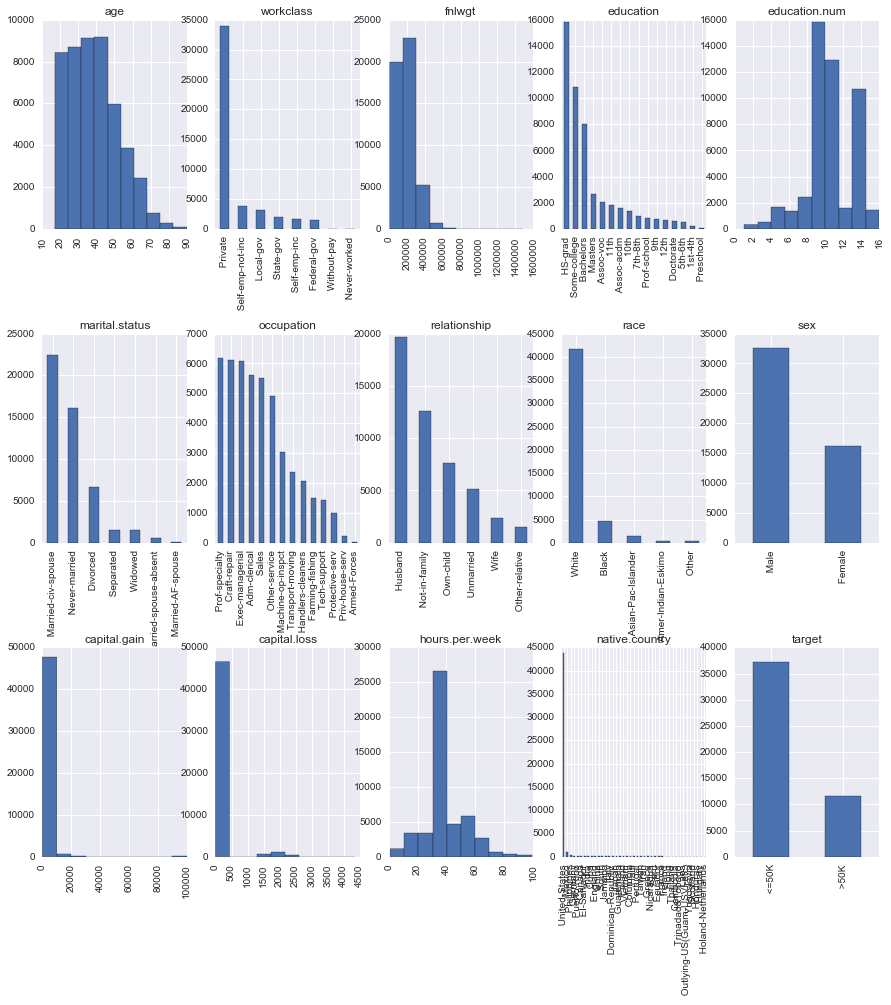

In [13]:
#Checking distribution of every attribute,mostly the data is from US
fig = plt.figure(figsize=(15,15))
cols = 5
rows = math.ceil(float(final_data.shape[1]) / cols)
for i, column in enumerate(final_data.columns):
    x = fig.add_subplot(rows, cols, i + 1)
    x.set_title(column)
    if final_data.dtypes[column] == np.object:
        final_data[column].value_counts().plot(kind="bar", axes=x)
    else:
        final_data[column].hist(axes=x)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

In [72]:
#89% of data is related to USA
(final_data["native.country"].value_counts()/final_data.shape[0])

In [73]:
#to check the NA values ,3 columns have NA values(workclass,occupation,native.country)
final_data.isnull().any()

In [16]:
#sum of NA's per column-proportion of values is very less
(final_data.isnull().sum())/(final_data.shape[0])

age               0.000000
workclass         0.057307
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017546
target            0.000000
dtype: float64

In [17]:
#Dropping the records with NA values
final_data = final_data.dropna()

In [18]:
final_data.shape

(45222, 15)

In [74]:
#sum of NA values accross the columns
final_data.isnull().sum()

In [21]:
final_data.target.value_counts()/final_data.shape[0]
#here we can say that if we make random guess there is 75% chance of having salary less than 50k

 <=50K    0.752156
 >50K     0.247844
Name: target, dtype: float64

In [75]:
#crosstab to understand the influence of education on target
pd.crosstab(final_data.education,final_data.target,margins=True)/final_data.shape[0]

In [76]:
pd.crosstab(final_data["education.num"],final_data.target,margins=True)/final_data.shape[0]

In [24]:
pd.crosstab(final_data.workclass,final_data.target,margins=True)/final_data.shape[0]
#As expected people from private firms are more in the category of >50k

target,<=50K,>50K,All
workclass,,,
Federal-gov,0.018951,0.012140,0.031091
Local-gov,0.048317,0.020234,0.068551
Private,0.576180,0.160342,0.736522
Self-emp-inc,0.016231,0.020167,0.036398
Self-emp-not-inc,0.060524,0.023418,0.083941
State-gov,0.031533,0.011499,0.043032
Without-pay,0.000420,0.000044,0.000464
All,0.752156,0.247844,1.000000


In [25]:
final_data1 =final_data

In [26]:
#as scikit learn takes only numeric values, label encoding all categorical attributes
from sklearn import preprocessing

for x in final_data.columns:
    if final_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(final_data[x].values))
        final_data[x] = lbl.transform(list(final_data[x].values))

In [77]:
final_data.dtypes

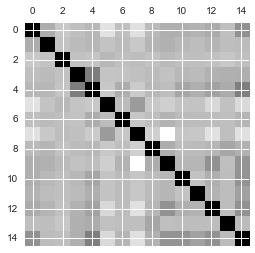

In [28]:
#Correlation plot
plt.matshow(final_data.corr())

In [78]:
final_data.corr()#education and education.num have the highest correlation, so we remove one column amongst them

In [30]:
#Dropping the column education
final_data = final_data.drop("education",axis=1)

In [31]:
final_data.shape

(45222, 14)

In [32]:
#Dividing the data into train and test
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(final_data[final_data.columns.difference(["target"])],
                                                                     final_data["target"],train_size=0.70, random_state=123)

In [80]:
#Building a logistic regression model and confusion matrix
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
confusion_Matrix = metrics.confusion_matrix(y_test,y_pred)
print confusion_Matrix

In [35]:
#Calculating the accuracy
metrics.accuracy_score(y_test,y_pred)

0.78838357779907131

In [79]:
#Random forest-the accuracy increase with Random Forest
import sklearn.ensemble as ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(X_train,y_train)
y_pred_rf = randomForest.predict(X_test)
confusion_Matrix = metrics.confusion_matrix(y_test,y_pred_rf)
print confusion_Matrix

In [37]:
metrics.accuracy_score(y_test,y_pred_rf)

0.85103560109088228

In [38]:
print (randomForest.feature_importances_)

[ 0.15350406  0.12062794  0.03970024  0.11371243  0.1749325   0.08795784
  0.08093175  0.01539525  0.06844001  0.01243042  0.07810653  0.01533298
  0.03892804]


In [81]:
#Mapping the feature importance column with their values
feats = {}
for feature,importance in zip(final_data.columns,randomForest.feature_importances_):
    feats[feature] = importance
print feats

In [66]:
#Features sorted by their score
features = final_data.columns
print sorted(zip(map(lambda x: round(x, 5), randomForest.feature_importances_), features), 
             reverse=True)

[(0.17493, 'marital.status'), (0.1535, 'age'), (0.12063, 'workclass'), (0.11371, 'education.num'), (0.08796, 'occupation'), (0.08093, 'relationship'), (0.07811, 'capital.loss'), (0.06844, 'sex'), (0.0397, 'fnlwgt'), (0.03893, 'native.country'), (0.0154, 'race'), (0.01533, 'hours.per.week'), (0.01243, 'capital.gain')]
